In [2]:
import FinanceDataReader as fdr

df_SP500 = fdr.StockListing('SP500')
tickers = list(df_SP500['Symbol'])
tickers.remove('BRKB')
print(tickers)

['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BFB', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI

In [7]:

df = fdr.DataReader(symbol='MMM', start='2021') # 삼성전자, 2020년~현재
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,175.000000,176.199997,170.550003,171.869995,161.677673,2996200
2021-01-05,172.009995,173.250000,170.649994,171.580002,161.404861,2295300
2021-01-06,172.720001,175.570007,172.039993,174.190002,163.860092,3346400
2021-01-07,171.559998,173.460007,166.160004,169.720001,159.655182,5863400
2021-01-08,169.169998,169.539993,164.610001,166.619995,156.739014,4808100
...,...,...,...,...,...,...
2022-11-09,125.290001,125.680000,123.720001,123.830002,123.830002,1782400
2022-11-10,127.660004,129.259995,126.870003,129.149994,129.149994,3159700
2022-11-11,129.589996,133.490005,129.149994,132.979996,132.979996,3429000


In [ ]:
# "DataReader"메서드는 주식 시세를 가져옵니다.
# "StockListing"메서드는 주식 종목들을 가져옵니다.

In [10]:
from collections import deque
import FinanceDataReader as fdr
import time
import datetime

tickers = []
# 코인 종가를 담을 deque 변수
ma5 = deque(maxlen = 5)
ma20 = deque(maxlen = 20)
ma60 = deque(maxlen = 60)

# 원화로 거래 가능한 코인 리스트
df_SP500 = fdr.StockListing('SP500')
tickers = list(df_SP500['Symbol'])
# ['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC'] ... 등등

# 로그인 정보 저장
#upbit = pyupbit.Upbit('wFAuJTKFqiSCj1xWXUW9juzMSlCDELPqcN2j2t2b', 'Z5bI1gRI2C7SyhvlqPOMbMsDQcbcKLrpcxe6wmGL')

ticker_select = tickers[0]
'''get_ohlcv 함수는 고가/시가/저가/종가/거래량을 DataFrame으로 반환합니다'''
df = fdr.DataReader(symbol=ticker_select, start= '2021-01-01', end='2022-01-01')

ma5.extend(df['Close'])    # ma20 변수에 종가 넣기
ma20.extend(df['Close'])    # ma60 변수에 종가 넣기
ma60.extend(df['Close'])   # ma120 변수에 종가 넣기

ma5 = df['Close'].rolling(window=5).mean()
df.insert(len(df.columns), "MA5", ma5)

ma20 = df['Close'].rolling(window=20).mean()
df.insert(len(df.columns), "MA20", ma20)

ma60 = df['Close'].rolling(window=60).mean()
df.insert(len(df.columns), "MA60", ma60)
df.to_csv('ma20')

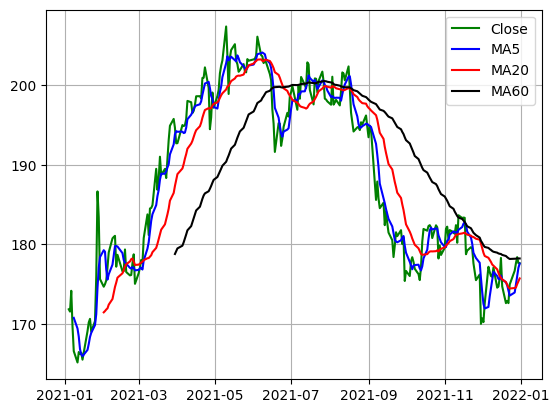

In [11]:

import matplotlib.pyplot as plt
plt.style.use('default')
plt.plot(df['Close'], 'g', label = 'Close')
plt.plot(df['MA5'], 'b', label = 'MA5')
plt.plot(df['MA20'], 'r', label = 'MA20')
plt.plot(df['MA60'], 'k', label = 'MA60')
plt.legend()
plt.grid()
plt.show()